In [1]:
import math
import contextily as ctx

import rasterio
from rasterio.plot import show

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

from descartes import PolygonPatch

In [3]:
path_img = r'C:\Users\bismarksr\Downloads\SENTINEL_2023-08-30.tif'

In [4]:
path_shp = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2023\PROYECTO AREA LIBERACION\SEGUIMIENTO2\SHP_SEGUIMIENTO\SHP_SEGUIMIENTO.shp'
path_shp_cat = r'G:\OneDrive - Ingenio Azucarero Guabira S.A\INFORMACION GENERAL\CATASTRO\catastro301023rv.shp'

In [5]:
shp_apli = gpd.read_file(path_shp)

In [6]:
cat = gpd.read_file(path_shp_cat)

In [7]:
apli = shp_apli[(shp_apli['unidad_01'] == 30) & (shp_apli['semana']==37)]

In [8]:
prop = cat[cat['unidad_01'] == 30]

In [9]:
import matplotlib.patches as mpatches


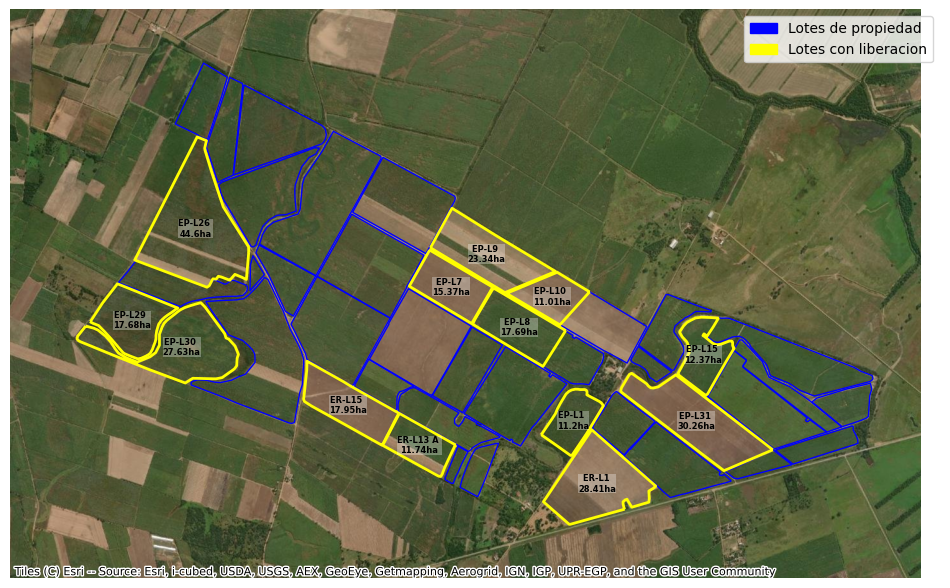

In [10]:
apli = apli.to_crs(epsg=3857)
prop = prop.to_crs(epsg=3857)
# Asegúrate de que 'gdf' es tu GeoDataFrame que ya tiene una columna 'geometry' con polígonos
# Crea una figura y un eje con Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

prop.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=1)
# Grafica los polígonos utilizando la función plot de Geopandas
# 'edgecolor' es el color del borde, 'facecolor' es el color de relleno
apli.plot(ax=ax, edgecolor='yellow', facecolor='none', linewidth=2)

for idx, row in apli.iterrows():
    # Representa el punto central del polígono
    centroid = row.geometry.centroid
    # Anota el 'id' en el centro
    ax.annotate(
        text=row['unidad_05'] + ' \n' + str(math.trunc(row['area']*100)/100) + 'ha', 
        xy=(centroid.x, centroid.y), 
        ha='center', 
        va='center', 
        weight=1000,
        fontsize=6,
        bbox=dict(facecolor=(1,1,1,0.3), edgecolor='none', pad=0))


# Agregar la imagen de satélite como mapa base con Contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Ajustar los límites del eje al área de los polígonos
#ax.set_xlim(apli.total_bounds[[0, 2]])
#ax.set_ylim(apli.total_bounds[[1, 3]])

minx, miny, maxx, maxy = prop.total_bounds
ax.set_xlim(minx - 500, maxx + 500)
ax.set_ylim(miny - 400, maxy + 400)

handle1 = mpatches.Patch(color='blue', label='Lotes de propiedad')
handle2 = mpatches.Patch(color='yellow', label='Lotes con liberacion')

# Añade la leyenda con los handles creados
ax.legend(handles=[handle1, handle2])

# Omitir los ejes para una visualización más limpia
ax.axis('off')

# Muestra el gráfico
plt.show()